In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

Leemos el dataset de los resultados

In [13]:
bt_resultados = pd.read_csv("resultados/resultado.csv");
bt_resultados.head()

,dataset,n,#locales,M,metodo,tiempo
0,densidad-alta-factibilidad,0,0,0,BT-F,0.000523
1,densidad-alta-factibilidad,1,1,7,BT-F,0.000446
2,densidad-alta-factibilidad,2,2,15,BT-F,0.000589
3,densidad-alta-factibilidad,3,3,22,BT-F,0.000574
4,densidad-alta-factibilidad,4,4,30,BT-F,0.000643


Experimentacion para factibilidad:

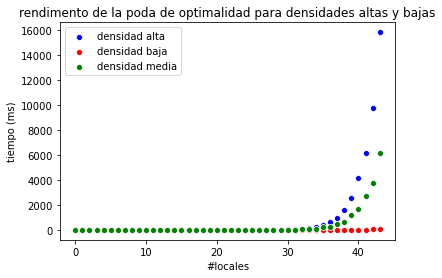

In [14]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_densidad_alta = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                (bt_resultados["dataset"]=="densidad-alta-factibilidad")].copy();
# densidad media
bt_complejidad_BT_densidad_media = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="densidad-media-factibilidad")].copy();
# densidad media
bt_complejidad_BT_densidad_baja = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="densidad-baja-factibilidad")].copy();
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_alta, x='#locales', y='tiempo', color="b", label="densidad alta");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_baja, x='#locales', y='tiempo', color="r", label="densidad baja");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_media, x='#locales', y='tiempo', color="g", label="densidad media");
fig.set_title('rendimento de la poda de optimalidad para densidades altas y bajas')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");

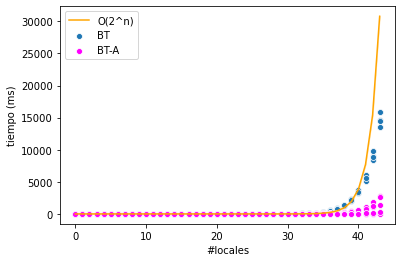

In [27]:
# Comparamos el dataset densidad-alta contra una función exponencial.
bt_complejidad_BT = bt_resultados[bt_resultados["metodo"]=="BT"].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"] * 0.0000000035; # Exponencial
bt_complejidad_BT_A = bt_resultados[bt_resultados["metodo"]=="BT-A"].copy();

fig = sns.scatterplot(data=bt_complejidad_BT, x='#locales', y='tiempo');
fig = sns.scatterplot(data=bt_complejidad_BT_A, x='#locales', y='tiempo', color="magenta");
fig = sns.lineplot(data=bt_complejidad_BT, x='#locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT', 'BT-A']);
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad.svg")

Índice de correlación de Pearson: 0.9828951431400004


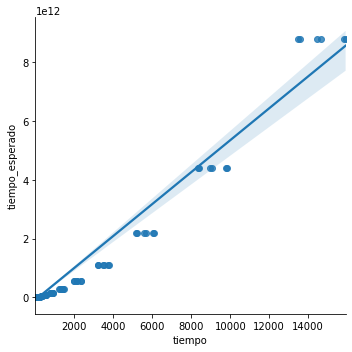

In [18]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
bt_complejidad_BT = bt_resultados[bt_resultados["metodo"]=="BT"].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"];
fig = sns.lmplot(data=bt_complejidad_BT, x="tiempo", y="tiempo_esperado");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(bt_complejidad_BT, "tiempo", "tiempo_esperado"));

Optimalidad:

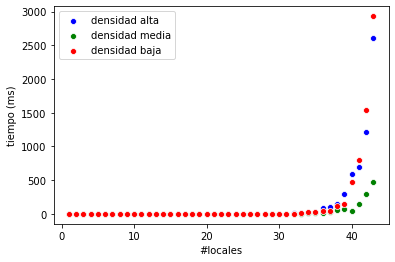

In [24]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_densidad_alta = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                (bt_resultados["dataset"]=="densidad-alta-optimalidad")].copy();
# densidad media
bt_complejidad_BT_densidad_media = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="densidad-media-optimalidad")].copy();
# densidad media
bt_complejidad_BT_densidad_baja = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="densidad-baja-optimalidad")].copy();
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_alta, x='#locales', y='tiempo', color="b", label="densidad alta");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_media, x='#locales', y='tiempo', color="g", label="densidad media");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_baja, x='#locales', y='tiempo', color="r", label="densidad baja");

fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");

### mejor y peor caso de optimalidad:

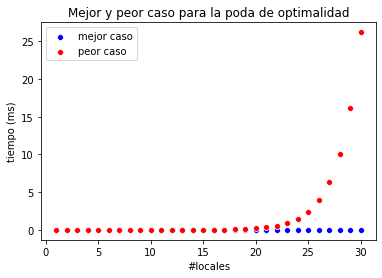

In [20]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_O_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-o")].copy();
# densidad media
bt_complejidad_BT_O_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-o")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_O_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
fig = sns.scatterplot(data=bt_complejidad_BT_O_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor y peor caso para la poda de optimalidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");

### Linealidad del mejor caso optimalidad:

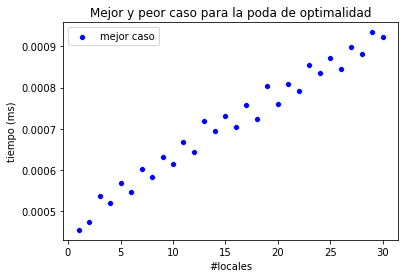

In [21]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_O_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-o")].copy();
# densidad media
bt_complejidad_BT_O_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-o")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_O_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
#fig = sns.scatterplot(data=bt_complejidad_BT_O_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor y peor caso para la poda de optimalidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");

### mejor y peor caso Factibilidad

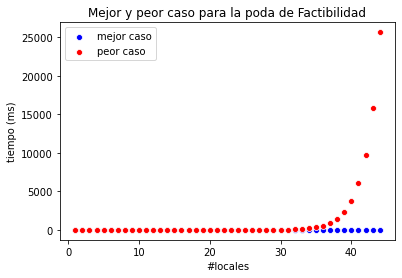

In [22]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_F_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-f")].copy();
# densidad media
bt_complejidad_BT_F_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-f")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_F_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
fig = sns.scatterplot(data=bt_complejidad_BT_F_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor y peor caso para la poda de Factibilidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");

### ver la linealidad de factibilidad:

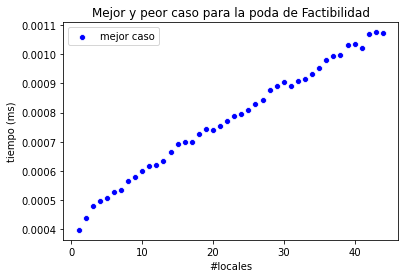

In [23]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_F_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-f")].copy();
# densidad media
bt_complejidad_BT_F_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-f")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_F_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
#fig = sns.scatterplot(data=bt_complejidad_BT_F_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor y peor caso para la poda de Factibilidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades.svg");